In [81]:
import pandas as pd

In [83]:
data = pd.read_csv('d.csv')

In [85]:
data

,Age,Income,Cards,Loan
0,35,7,3,0
1,22,10,2,1
2,63,40,1,0
3,25,9,2,1
4,59,35,1,0


In [89]:
X = data.drop('Loan', axis=1)
y = data['Loan']

In [91]:
X

,Age,Income,Cards
0,35,7,3
1,22,10,2
2,63,40,1
3,25,9,2
4,59,35,1


In [93]:
y

0    0
1    1
2    0
3    1
4    0
Name: Loan, dtype: int64

In [95]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [133]:
def knn_func(train_x, train_label, test_x, k):
    """
    train_x - train features
    train_label - train targets
    test_x - validation data(features)
    k - nearest neighbours <int>
    """
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_x, train_label)
    prediction = knn.predict(test_x)
    return prediction,knn

In [113]:
import math
n = data.shape[0]
k_max = math.sqrt(n)
k_max

2.23606797749979

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

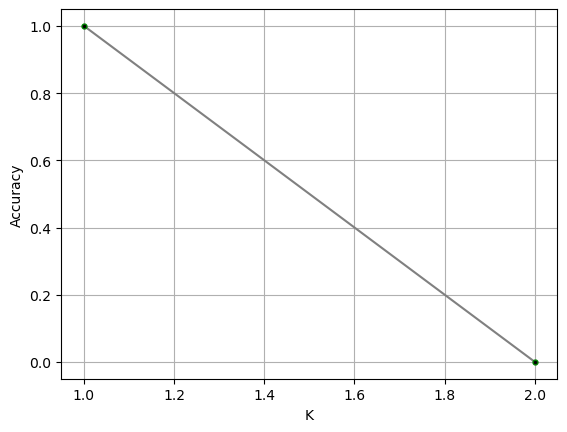

In [117]:
normal_accuracy = []
k_values = range(1,3)

for k in k_values :
    y_pred = knn_func(X_train,y_train,X_test,k)
    accur = accuracy_score(y_test,y_pred)
    normal_accuracy.append(accur)

plt.plot(k_values,normal_accuracy,c="grey",marker=".",ms=7,mfc="black",mec="green")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [135]:
y_pred,model = knn_func(X_train, y_train, X_test, k=1)

In [137]:
def check_loan_eligibility(features, model):
    """
    Check loan eligibility using the trained k-NN model.

    Parameters:
    features (list): List of input features [Age, Income, Cards].
    model (KNeighborsClassifier): The trained k-NN model.

    Returns:
    int: Predicted loan eligibility (0 or 1).
    """
    # Scale the features using the same scaler used for training
    scaled_features = scaler.transform([features])
    
    # Predict loan eligibility using the trained k-NN model
    loan_prediction = model.predict(scaled_features)
    
    return loan_prediction[0]  # Return the predicted value (0 or 1)

In [139]:
new_customer = [30, 7, 2]  # Example features
eligibility = check_loan_eligibility(new_customer, model)

print(f"Loan eligibility (0 = Not Eligible, 1 = Eligible): {eligibility}")

Loan eligibility (0 = Not Eligible, 1 = Eligible): 0


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
